# Дипломная работа

Проектная работа по модулю “Математика и статистика в Python”
1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns
from scipy import stats

### 1. Загрузить файл hr.csv

In [2]:
df = pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df_sample = df.filter(items = ['satisfaction_level',
                               'last_evaluation',
                               'average_montly_hours',
                               'time_spend_company',
                               'Work_accident',
                               'left',
                               'promotion_last_5years'])

In [4]:
df_sample.shape

(14999, 7)

### 3. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [5]:
def stats_(row):
    try:
        list_ = [statistics.mean(row), statistics.median(row), statistics.mode(row), min(row), max(row), statistics.pstdev(row)]
    except:
        list_ = [statistics.mean(row), statistics.median(row), '', min(row), max(row), statistics.pstdev(row)]
    return list_

In [6]:
stats_dict = {}
stats_dict['Stats'] = ['Mean', 'Median', 'Mode', 'Min', 'Max', 'Standard deviation']
for x in df_sample.columns.tolist():
    stats_dict[x] = stats_(df_sample[x])
df_stats = pd.DataFrame(stats_dict)
df_stats

,Stats,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,Mean,0.612834,0.716102,201.05,3.498233,0.144610,0.238083,0.021268
1,Median,0.640000,0.720000,200,3.000000,0.000000,0.000000,0.000000
2,Mode,0.100000,0.550000,,3.000000,0.000000,0.000000,0.000000
3,Min,0.090000,0.360000,96,2.000000,0.000000,0.000000,0.000000
4,Max,1.000000,1.000000,310,10.000000,1.000000,1.000000,1.000000
5,Standard deviation,0.248622,0.171163,49.9414,1.460088,0.351707,0.425910,0.144277


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

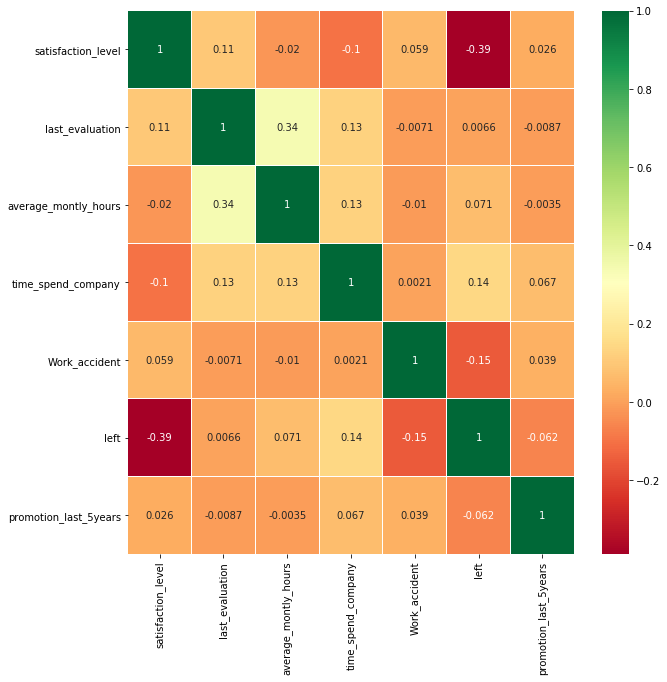

In [7]:
sns.heatmap(df_sample.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными

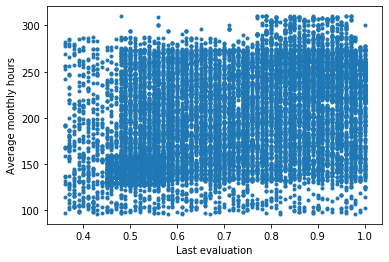

In [43]:
plt.scatter(df['last_evaluation'], df['average_montly_hours'], marker='.')
plt.xlabel('Last evaluation')
plt.ylabel('Average monthly hours')
plt.show()

Судя по данному графику, не смотря на то, что между данными переменными самый большой коэффициент корреляции, они мало зависят друг от друга.

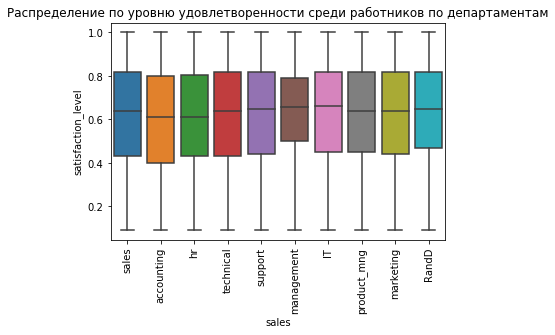

In [24]:
ax = sns.boxplot(x="sales", y="satisfaction_level", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Распределение по уровню удовлетворенности среди работников по департаментам')
ax

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [10]:
accidents = df[df['Work_accident']==1]['average_montly_hours']
no_accidents = df[df['Work_accident']==0]['average_montly_hours']

In [11]:
print(len(accidents), len(no_accidents))

2169 12830


In [12]:
stats.ttest_ind(accidents, no_accidents)

Ttest_indResult(statistic=-1.2421846964457004, pvalue=0.21418784880707778)

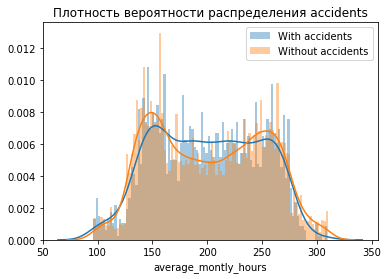

In [13]:
sns.distplot(accidents, 100)
sns.distplot(no_accidents, 100)
plt.title('Плотность вероятности распределения accidents')
plt.legend(['With accidents', 'Without accidents'])
plt.show()

In [14]:
prom = df[df['promotion_last_5years']==1]['last_evaluation']
no_prom = df[df['promotion_last_5years']==0]['last_evaluation']

In [15]:
print(len(prom), len(no_prom))

319 14680


In [16]:
stats.ttest_ind(prom, no_prom)

Ttest_indResult(statistic=-1.0634737591328758, pvalue=0.28758428228213795)

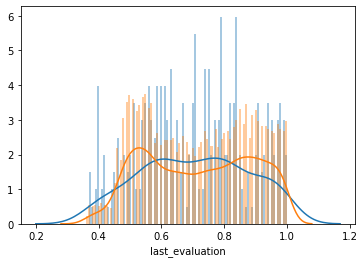

In [17]:
sns.distplot(prom, 100)
sns.distplot(no_prom, 100)
plt.show()

В обоих случаях p-value намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что нет статистического различия в двух анализируемых примерах между выборками.

### 6. Рассчитать сколько работников работает в каждом департаменте

In [18]:
dep_count = df['sales'].reset_index().groupby(['sales']).count().sort_values(by = 'index', ascending = False).reset_index()
dep_count.columns = ['Department name', 'Amount of workers']
dep_count['%'] = (dep_count['Amount of workers'] / dep_count['Amount of workers'].sum()) * 100
dep_count

,Department name,Amount of workers,%
0,sales,4140,27.601840
1,technical,2720,18.134542
2,support,2229,14.860991
3,IT,1227,8.180545
4,product_mng,902,6.013734
5,marketing,858,5.720381
6,RandD,787,5.247016
7,accounting,767,5.113674
8,hr,739,4.926995
9,management,630,4.200280


### 7. Показать распределение сотрудников по зарплатам

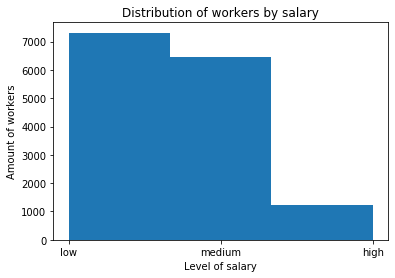

In [19]:
plt.ylabel('Amount of workers')
plt.xlabel('Level of salary')
plt.title('Distribution of workers by salary')
plt.hist(df['salary'], 3)
plt.show()

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

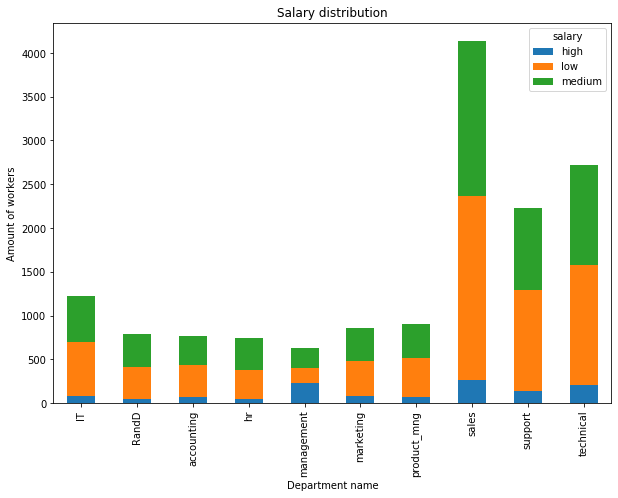

In [47]:
df_pivot = df.pivot_table(index = 'sales', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count')
df_pivot.plot.bar(stacked=True, figsize=(10,7))
plt.ylabel('Amount of workers')
plt.xlabel('Department name')
plt.title('Salary distribution')
plt.show()

### 9. Сколько сотрудников покинули компанию

In [21]:
print('Amount of workers who left the company: ', df['left'].sum())

Amount of workers who left the company:  3571


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

**Сравним уровень удовлетворенности у ушедших сотрудников с уровнем удовлетворенности работающих в компании**

- Гипотеза H0 - уровень удовлетворенности у ушедших сотрудников ниже
- Гипотеза H1 - уровень удовлетворенности у ушедших сотрудников на том же уровне

In [39]:
left = df[df['left']==1]['satisfaction_level']
workers = df[df['left']==0]['satisfaction_level']

In [41]:
stats.ttest_ind(left, workers)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

p-value намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу - уровень удовлетворенности у ушедших сотрудников статистически не отличается от уровнея удовлетворенности действующих сотрудников.

**Сравним распределение по уровню зарплаты у ушедших сотрудников и у работающих**

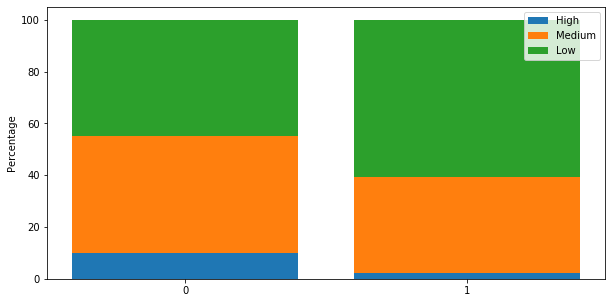

In [103]:
df_pivot_2 = df.pivot_table(index = 'left', 
                            columns = 'salary', 
                            values = 'satisfaction_level', 
                            aggfunc = 'count').reset_index()
f, ax = plt.subplots(1, figsize=(10,5))
bar_width = 1

bar_l = [i for i in range(len(df_pivot_2['high']))]  

totals = [i+j+k for i,j,k in zip(df_pivot_2['high'], df_pivot_2['medium'], df_pivot_2['low'])]
pre_rel = [i / j * 100 for  i,j in zip(df_pivot_2['high'], totals)]
mid_rel = [i / j * 100 for  i,j in zip(df_pivot_2['medium'], totals)]
post_rel = [i / j * 100 for  i,j in zip(df_pivot_2['low'], totals)]

ax.bar(bar_l, 
       pre_rel, 
       label='High')
ax.bar(bar_l, 
       mid_rel, 
       bottom=pre_rel, 
       label='Medium')
ax.bar(bar_l, 
       post_rel, 
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
       label='Low')

plt.xticks(df_pivot_2['left'])
ax.set_ylabel("Percentage")
plt.legend(['High', 'Medium', 'Low'])

plt.show()

У уволившихся сотрудников преобладает низкий уровень зарплаты, в то время как сотрудников с высоким уровенем менее 5%. Это может являтся одной из причин уволнения сотрудников.

**Сравним среднемесячное отработанное время у ушедших сотрудников со среднемесячным отработанным временем работающих в компании**

- Гипотеза H0 - среднемесячное время у ушедших сотрудников выше
- Гипотеза H1 - среднемесячное время у ушедших сотрудников на том же уровне

In [114]:
left_2 = df[df['left']==1]['average_montly_hours']
workers_2 = df[df['left']==0]['average_montly_hours']

In [116]:
stats.ttest_ind(left_2, workers_2)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

p-value выше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу

**Посмотрим в какие департаментах наибольшая текучесть кадров**

In [133]:
df_pivot_3 = df.pivot_table(index = 'sales', 
                            columns = 'left', 
                            values = 'satisfaction_level', 
                            aggfunc = 'count')
df_pivot_3['staff turnover'] = df_pivot_3[1] / (df_pivot_3[0] + df_pivot_3[1]) * 100
df_pivot_3.sort_values(by = 'staff turnover', ascending = False).reset_index()

left,sales,0,1,staff turnover
0,hr,524,215,29.093369
1,accounting,563,204,26.597132
2,technical,2023,697,25.625000
3,support,1674,555,24.899058
4,sales,3126,1014,24.492754
5,marketing,655,203,23.659674
6,IT,954,273,22.249389
7,product_mng,704,198,21.951220
8,RandD,666,121,15.374841
9,management,539,91,14.444444


In [144]:
sample_2 = df.groupby(['sales']).agg({'satisfaction_level': 'mean', 
                                      'last_evaluation': 'mean', 
                                     'average_montly_hours': 'mean',
                                     'Work_accident': 'sum',
                                     'left': 'sum',
                                     'promotion_last_5years': 'sum'})
sample_2

,satisfaction_level,last_evaluation,average_montly_hours,Work_accident,left,promotion_last_5years
sales,,,,,,
IT,0.618142,0.716830,202.215974,164,273,3
RandD,0.619822,0.712122,200.800508,134,121,27
accounting,0.582151,0.717718,201.162973,96,204,14
hr,0.598809,0.708850,198.684709,89,215,15
management,0.621349,0.724000,201.249206,103,91,69
marketing,0.618601,0.715886,199.385781,138,203,43
product_mng,0.619634,0.714756,199.965632,132,198,0
sales,0.614447,0.709717,200.911353,587,1014,100
support,0.618300,0.723109,200.758188,345,555,20


In [142]:
sample_2[['satisfaction_level']].sort_values(by = 'satisfaction_level', ascending = False).style.bar()

,satisfaction_level
sales,
management,0.621349
RandD,0.619822
product_mng,0.619634
marketing,0.618601
support,0.618300
IT,0.618142
sales,0.614447
technical,0.607897
hr,0.598809


In [146]:
sample_2[['last_evaluation']].sort_values(by = 'last_evaluation', ascending = False).style.bar()

,last_evaluation
sales,
management,0.724000
support,0.723109
technical,0.721099
accounting,0.717718
IT,0.716830
marketing,0.715886
product_mng,0.714756
RandD,0.712122
sales,0.709717


Самая высокая текучесть кадров в департаменте HR. Этот департамент занимает последнюю строчку по уровню удовлетворенности и последней оценке персонала. Что так же может влиять на то, почему сотрудники покидают компанию.